In [3]:
import sys
sys.path.append("/Users/Habib/Google Drive/Uni Heidelberg/12 SS 2018/Masterarbeit/")

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from skimage.feature import peak_local_max
from copy import deepcopy
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
import os
from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage.interpolation import zoom
from skimage.feature import structure_tensor, structure_tensor_eigvals
from skimage import exposure
from scipy.misc import imresize

In [3]:
from shapes import *
from detect_bubbles import *
from evaluate import *

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

In [6]:
train_dir = "data/train/"
train_img_read = [cv2.imread(os.path.join(train_dir, filename), 0) for filename in os.listdir(train_dir)
            if filename.endswith(".png")]

In [7]:
mess = cv2.imread("/Users/Habib/Google Drive/Uni Heidelberg/11 WS 2017-2018/Masterarbeit/Messungen/Reihe_16/acA1920-155um__21836660__20180418_153328495_0052.bmp", 0)
mess2 = cv2.imread("/Users/Habib/Google Drive/Uni Heidelberg/11 WS 2017-2018/Masterarbeit/Messungen/Reihe_16/acA1920-155um__21836660__20180418_153328495_0627.bmp", 0)
one = cv2.imread("data/one_mess.png", 0)

In [8]:
mess_small = [cv2.imread( os.path.join("data", filename), 0) for filename in os.listdir("data") if filename.endswith("png")]

In [9]:
def show(Axx, Axy, Ayy):
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    plt.imshow(Axx)#, vmax=.8)
    plt.colorbar()
    plt.subplot(222)
    plt.imshow(Ayy)#, vmax=.8)
    plt.colorbar()
    plt.subplot(223)
    plt.imshow(Axy)#, vmax=.8)
    plt.colorbar()

In [10]:
def show2(Axx, Axy):
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    plt.imshow(Axx)#, vmax=.8)
    plt.colorbar()
    plt.subplot(222)
    plt.imshow(Axy)#, vmax=.8)
    plt.colorbar()

In [11]:
r1 = Rectangle(1,3, 4,6)
r2 = Rectangle(3,5, 5,7)
r3 = Rectangle(1,1, 2,2)

In [12]:
rr = Rectangle()

In [13]:
rr.by_center_width_height(15,10, 1,1)

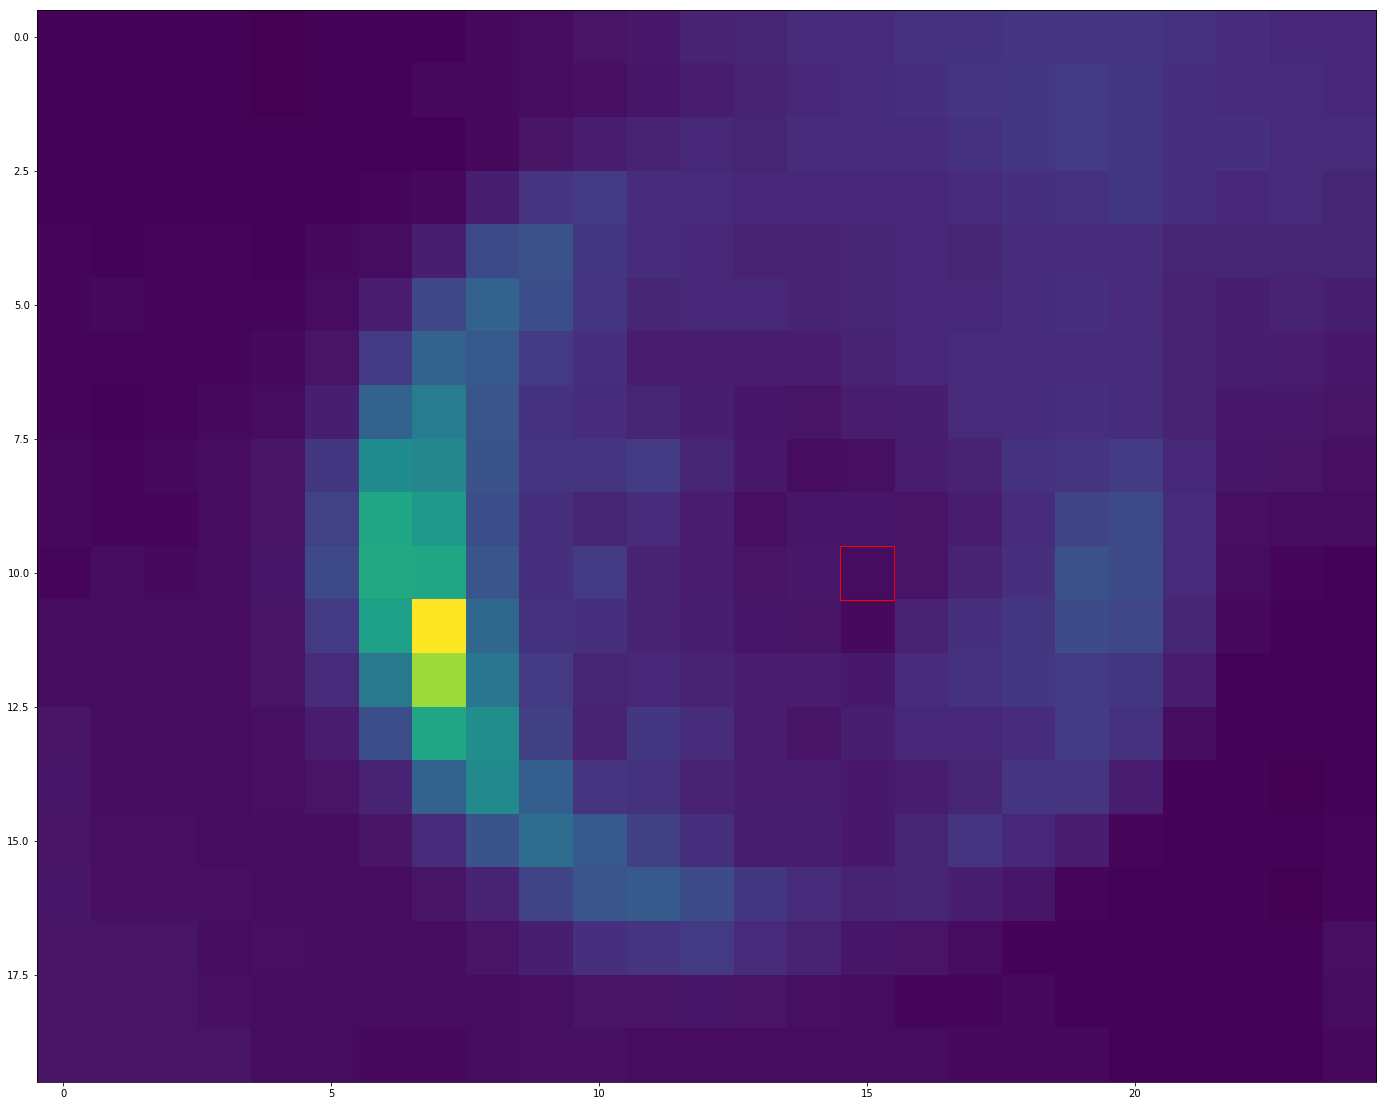

In [14]:
fig,ax = plt.subplots(1)
fig.set_size_inches(24,24)
#one[rr.ymin, rr.xmin] = 0
ax.imshow(one)

#rect = patches.Circle((15, 10),
#                      0.01,
#                      linewidth=2,
#                     edgecolor='r',
#                     fill=False)
#rect = patches.Rectangle(xy=(10,15), width=1,height=1, color='r', fill=False)
rect = patches.Rectangle(xy=(rr.xmin, rr.ymin), width=rr.width, height=rr.height, color='r', fill=False)
ax.add_patch(rect)

In [15]:
one.min()

20

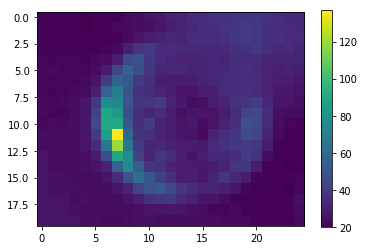

In [16]:
plt.imshow(one)
plt.colorbar()

In [17]:
lm = peak_local_max(one, threshold_abs=100)[0]
loc_max = Point(lm[0], lm[1])
loc_max.get_coord()

(11, 7)

In [18]:
size = 31
xx = np.linspace(0,10, size)
yy = np.linspace(0,10, size)
XX, YY = np.meshgrid(xx, yy)
smooth_mask = utils.gauss_2d_mask([XX,YY], amp=10, mu=[5,5], sigma=[1,1])

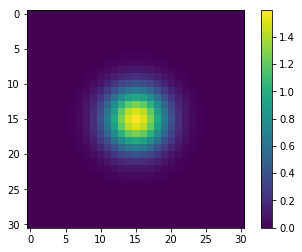

In [19]:
plt.imshow(smooth_mask)
plt.colorbar()

In [20]:
np.pad?

In [21]:
one_pad = np.pad(one, (30, 30), mode="edge")
lm_pad = peak_local_max(one_pad, threshold_abs=100)[0]
loc_max_pad = Point(lm_pad[0], lm_pad[1])

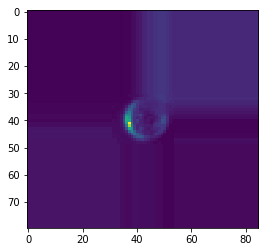

In [22]:
plt.imshow(one_pad)

In [23]:
Axx, Axy, Ayy = utils.my_structure_tensor(one, smooth_mask)

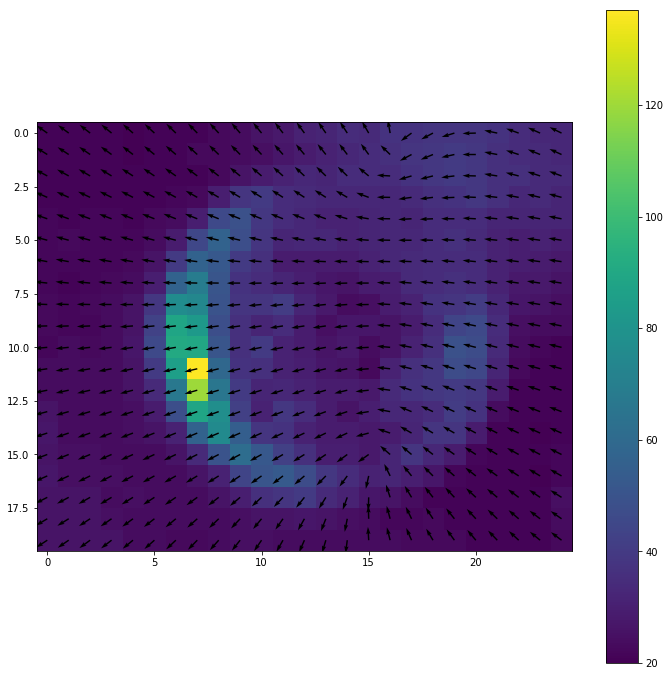

In [24]:
n, m = Axx.shape 
X, Y = np.mgrid[0:n, 0:m]
T = .5 * np.arctan2(2 * Axy, Ayy-Axx)
R = np.ones((one.shape))
U, V = R * (-np.cos(T)), R * (np.sin(T))
plt.figure(figsize=(12,12))
_ = plt.quiver(U, V)
_ = plt.imshow(one)
plt.colorbar()

In [25]:
curve = curve_from_orientation_fit(input_img=one_pad, 
                                   loc_max=loc_max_pad,
                                   smooth_mask=smooth_mask,
                                   next_step_size=1,
                                  proportion_threshold=2,
                                   fit_line_nb_samples=30,
                                   len_curve_threshold=40,
                                   curve_preferred_direction="DOWN",
                                  include_first_point=True)

fit converged! mu= 14.863392391472157
result point =  (38.756102116561955, 46.604760890144696)
samples 0: (42.13748789178159, 32.131106768879576)
len(samples) 30
result point:  (41.07583252611876, 36.67540711792533)
############ new position ############
curr_pos:  (41, 37)
curr_orientation -13.149788354880622
fit_line= (41, 37) (-0.22749757835631768, 0.9737786462240847)
(42.13748789178159, 32.131106768879576) 6.0
(42.061655365662816, 32.45569965095427) 6.0
(41.98582283954404, 32.78029253302897) 6.0
(41.90999031342527, 33.104885415103666) 6.052442707551833
(41.834157787306495, 33.42947829717836) 6.214739148589182
(41.75832526118772, 33.75407117925306) 6.37703558962653
(41.68249273506895, 34.07866406132776) 6.69479273909633
(41.606660208950174, 34.403256943402454) 7.5444393895908775
(41.5308276828314, 34.72784982547715) 8.467930134709114
(41.45499515671263, 35.05244270755185) 9.843049573469097
(41.379162630593854, 35.377035589626544) 13.302552465345986
(41.30333010447508, 35.70162847170

no fit, mu = 15
no fit, direction= <shapes.Point object at 0x10494eba8>
samples 0: (46.06204512240337, 44.77216586344901)
len(samples) 30
result point:  (51.039089869423556, 45.25073204085657)
############ new position ############
curr_pos:  (51.039089869423584, 45.25073204085653)
curr_orientation 84.5076277349689
fit_line= (51.039089869423584, 45.25073204085653) (0.9954089494040437, 0.0957132354815047)
(46.06204512240337, 44.77216586344901) 7.91578901414762
(46.39384810553805, 44.80407027527618) 7.5520816191857705
(46.72565108867273, 44.83597468710335) 7.188374224223921
(47.057454071807406, 44.86787909893052) 6.8333371844109445
(47.389257054942085, 44.89978351075769) 6.529016216441421
(47.721060038076764, 44.931687922584864) 6.240574217001018
(48.052863021211444, 44.963592334412034) 6.008620761597433
(48.38466600434612, 44.995496746239205) 6.000692751282518
(48.7164689874808, 45.027401158066375) 5.996115460954621
(49.04827197061548, 45.059305569893546) 5.999999999999999
(49.380074953

no fit, mu = 15
no fit, direction= <shapes.Point object at 0x123b875c0>
samples 0: (56.54591774282278, 44.05205885557176)
len(samples) 30
result point:  (51.55051149365218, 44.26633999274276)
############ new position ############
curr_pos:  (51.55051149365218, 44.266339992742715)
curr_orientation -87.54376677452326
fit_line= (51.55051149365218, 44.266339992742715) (-0.9990812498341207, 0.042856227434191846)
(56.54591774282278, 44.05205885557176) 6.0
(56.21289065954474, 44.06634426471649) 6.0
(55.8798635762667, 44.080629673861225) 6.0
(55.54683649298866, 44.09491508300596) 6.0
(55.21380940971062, 44.10920049215069) 6.0
(54.88078232643258, 44.123485901295425) 6.000000000000001
(54.54775524315454, 44.13777131044016) 6.0
(54.2147281598765, 44.15205671958489) 6.0
(53.88170107659846, 44.166342128729625) 6.0
(53.54867399332042, 44.18062753787436) 6.0
(53.21564691004238, 44.19491294701909) 6.0
(52.88261982676434, 44.209198356163824) 6.0
(52.5495927434863, 44.22348376530856) 6.0
(52.2165656602

no fit, mu = 15
no fit, direction= <shapes.Point object at 0x123be30f0>
samples 0: (47.165299457844824, 44.70618932801839)
len(samples) 30
result point:  (52.13190663203945, 45.283088952943494)
############ new position ############
curr_pos:  (52.131906632039424, 45.283088952943466)
curr_orientation 83.37446098221805
fit_line= (52.131906632039424, 45.283088952943466) (0.9933214348389207, 0.11537992498501579)
(47.165299457844824, 44.70618932801839) 6.883411020007305
(47.49640660279113, 44.7446493030134) 6.5379774158846535
(47.82751374773744, 44.7831092780084) 6.211645370534956
(48.15862089268375, 44.82156925300341) 6.0375319756564405
(48.48972803763006, 44.86002922799842) 6.017855790125921
(48.82083518257637, 44.898489202993424) 6.004546790853053
(49.151942327522676, 44.93694917798843) 6.0
(49.483049472468984, 44.97540915298344) 6.0
(49.81415661741529, 45.013869127978445) 5.999999999999999
(50.1452637623616, 45.05232910297345) 6.0
(50.47637090730791, 45.09078907796846) 6.0
(50.80747805

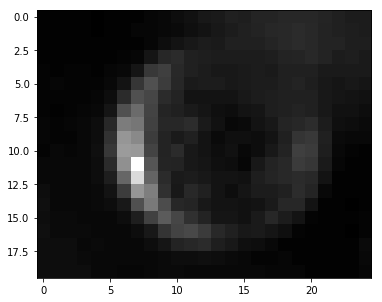

In [26]:
colors = cm.rainbow(np.linspace(0, 1, len(curve)))
fig,ax = plt.subplots(1)
fig.set_size_inches(6,6)
ax.imshow(one, cmap="gray")
for pt, col in zip(curve, colors):
    rect = patches.Circle((pt.y, pt.x),
                              0.1,linewidth=1,
                          edgecolor=col,facecolor='none')
    ax.add_patch(rect)

In [27]:
curve += curve_from_orientation_fit(input_img=one_pad, 
                                   loc_max=loc_max_pad,
                                   smooth_mask=smooth_mask,
                                   next_step_size=1,
                                  proportion_threshold=2,
                                    len_curve_threshold=13,
                                    fit_line_max_length=6,
                                fit_line_nb_samples=30,
                                  curve_preferred_direction="UP",
                                  include_first_point=False)

fit converged! mu= 14.332634363905875
result point =  (38.421853125813826, 48.0354773490368)
samples 0: (41.682492735068955, 34.07866406132774)
len(samples) 30
result point:  (41.04549951567122, 36.805244270755196)
############ new position ############
curr_pos:  (41, 37)
curr_orientation -13.149788354880622
fit_line= (41, 37) (-0.22749757835631768, 0.9737786462240847)
(41.682492735068955, 34.07866406132774) 6.694792739096295
(41.63699321939769, 34.27341979057256) 7.195719438038177
(41.59149370372642, 34.46817551981738) 7.72323001104459
(41.545994188055154, 34.6629312490622) 8.277324458115535
(41.50049467238389, 34.857686978307015) 8.85800277925101
(41.45499515671262, 35.05244270755183) 9.843049573468964
(41.40949564104135, 35.24719843679665) 11.899551843992949
(41.363996125370086, 35.44195416604147) 14.013652508323418
(41.31849660969882, 35.63670989528629) 16.18535156646037
(41.27299709402755, 35.831465624531106) 18.414649018403804
(41.227497578356285, 36.026221353775924) 20.75669141

In [28]:
sample_fit_line?

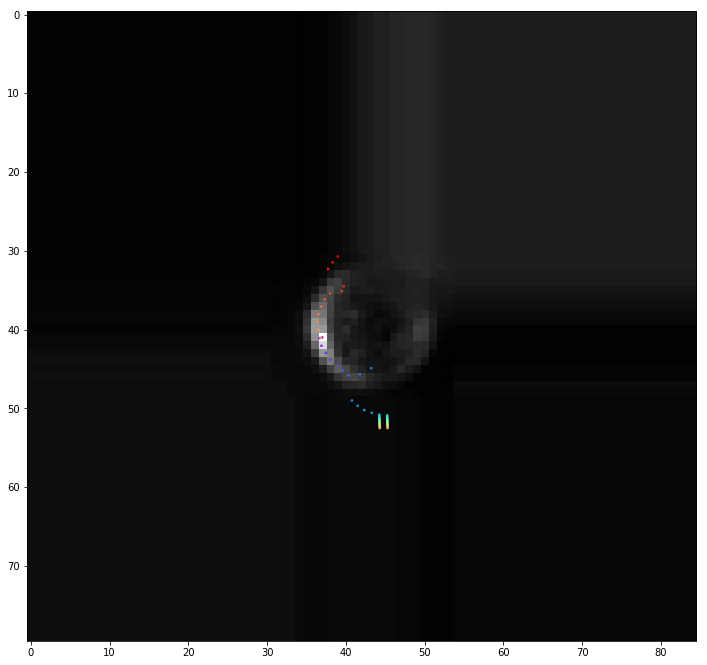

In [29]:
colors = cm.rainbow(np.linspace(0, 1, len(curve)))
fig,ax = plt.subplots(1)
fig.set_size_inches(6,6)
ax.imshow(one_pad, cmap="gray")
for pt, col in zip(curve, colors):
    rect = patches.Circle((pt.y, pt.x),
                              0.1,linewidth=1,
                          edgecolor=col,facecolor='none')
    ax.add_patch(rect)
fig.set_size_inches(12,12)

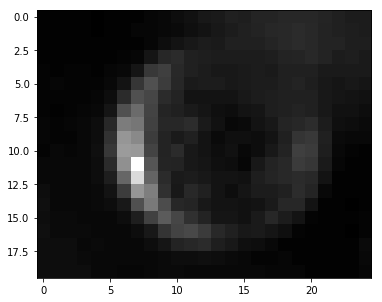

In [30]:
colors = cm.rainbow(np.linspace(0, 1, len(curve)))
fig,ax = plt.subplots(1)
fig.set_size_inches(6,6)
ax.imshow(one, cmap="gray")
for pt, col in zip(curve, colors):
    rect = patches.Circle((pt.y, pt.x),
                              0.1,linewidth=1,
                          edgecolor=col,facecolor='none')
    ax.add_patch(rect)

In [31]:
fit_line = Line(point=Point(11,5), direction=Point(0,1))

In [32]:
pos = Point(10,5)
max_len = 10
nb_samples = 4
sample_step_size = float(max_len) / nb_samples


In [33]:
samples, values = sample_fit_line(fit_line=fit_line, pos=pos, img=one, max_len=10, nb_samples=20, bsize=1)
for s, v in zip(samples, values):
    print(s.get_coord(), v)

(10.0, 0.0) 22.0
(10.0, 0.5) 11.5
(10.0, 1.0) 24.0
(10.0, 1.5) 11.75
(10.0, 2.0) 23.0
(10.0, 2.5) 11.75
(10.0, 3.0) 24.0
(10.0, 3.5) 12.75
(10.0, 4.0) 27.0
(10.0, 4.5) 18.25
(10.0, 5.0) 46.0
(10.0, 5.5) 34.25
(10.0, 6.0) 91.0
(10.0, 6.5) 45.25
(10.0, 7.0) 90.0
(10.0, 7.5) 35.25
(10.0, 8.0) 51.0
(10.0, 8.5) 21.75
(10.0, 9.0) 36.0
(10.0, 9.5) 19.0


In [34]:
np.min(samples)

TypeError: unorderable types: Point() <= Point()

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, len(samples)))
fig,ax = plt.subplots(1)
fig.set_size_inches(6,6)
ax.imshow(one, cmap="gray")
for pt, col in zip(samples, colors):
    rect = patches.Circle((pt.y, pt.x),
                              0.1,linewidth=1,
                          edgecolor=col,facecolor='none')
    print(pt.get_coord())
    ax.add_patch(rect)

In [ ]:
rr = Rectangle()
rr.by_center_width_height(10,7, 1,1)
px1 = Rectangle()
px1.by_center_width_height(10,7, 1,1)

In [ ]:
print(px1.xmin)
print(px1.ymin)
print(px1.xmax)
print(px1.ymax)

In [ ]:
360 * 42e-6 * 23e3

In [ ]:
313.9%180

In [ ]:
(360 * 23.5e3 * 42.6e-6  )% 180

In [ ]:
np.sqrt((360*42e-6*1.95e3)**2 + (360*23e3*1.2e-6)**2)

In [6]:
a = 0.937
b = 0.829
da = 0.025
db = 0.028

In [7]:
np.sqrt(1/(a**2 - b**2) * (db**2 + da**2*(b**2/a**2)) )

0.08170442772341589